# PTB XL+ Dataset EDA


## Library Imports

In [1]:
import pandas as pd
import numpy as np
import ast
import wfdb
import matplotlib.pyplot as plt
from warnings import filterwarnings

ModuleNotFoundError: No module named 'wfdb'

In [26]:
filterwarnings('ignore')

In [27]:
path = 'C:\\Users\\Luke Bogdanovic\\Downloads\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\\'
sampling_rate=100

## EDA

In [28]:
df = pd.read_csv(path+'ptbxl_database.csv')
df.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [29]:
df.tail()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
21794,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21796,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21797,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr
21798,21837,11744.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-11 16:43:01,...,True,NaN,", I-AVL,",NaN,NaN,NaN,NaN,9,records100/21000/21837_lr,records500/21000/21837_hr


In [30]:
df.isna().sum()

ecg_id                              0
patient_id                          0
age                                 0
sex                                 0
height                          14825
weight                          12378
nurse                            1473
site                               17
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8468
infarction_stadium1             16187
infarction_stadium2             21696
validated_by                     9378
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20201
static_noise                    18539
burst_noise                     21186
electrodes_problems             21769
extra_beats                     19850
pacemaker                       21508
strat_fold                          0
filename_lr 

In [31]:
df.describe()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21837.000000,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [2]:
import tensorflow as tf
from keras import layers, models
from keras.api.datasets import imdb
from keras.api.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load and preprocess data
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)

# Load the data as lists of integers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Build model
model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.Conv1D(32, 7, activation='relu'),
    layers.MaxPooling1D(5),
    layers.Conv1D(32, 7, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Train model
model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate model
test_loss, test_acc, test_auc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test AUC: {test_auc:.2f}')

# Save model
model.save("imdb_cnn_model.h5")

# Calculate AUC using sklearn for more detailed analysis
predictions = model.predict(test_data).ravel()
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)
print(f'Sklearn AUC: {roc_auc:.2f}')

/home/elukbog/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5


I0000 00:00:1729625377.904301    1416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729625377.984784    1416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729625377.984872    1416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729625377.988629    1416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729625377.988702    1416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

 36/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5300 - auc: 0.5029 - loss: 0.6920

I0000 00:00:1729625381.744312    1620 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6566 - auc: 0.7167 - loss: 0.5841 - val_accuracy: 0.8650 - val_auc: 0.9427 - val_loss: 0.3248
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - auc: 0.9700 - loss: 0.2236 - val_accuracy: 0.8732 - val_auc: 0.9506 - val_loss: 0.3026
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - auc: 0.9923 - loss: 0.1128 - val_accuracy: 0.8760 - val_auc: 0.9467 - val_loss: 0.3441
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - auc: 0.9991 - loss: 0.0408 - val_accuracy: 0.8714 - val_auc: 0.9417 - val_loss: 0.4194
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9985 - auc: 0.9999 - loss: 0.0125 - val_accuracy: 0.8714 - val_auc: 0.9347 - val_loss: 0.5298
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8530 - auc: 0.9215 - loss: 0.5957


Test accuracy: 0.86
Test AUC: 0.92
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Sklearn AUC: 0.93


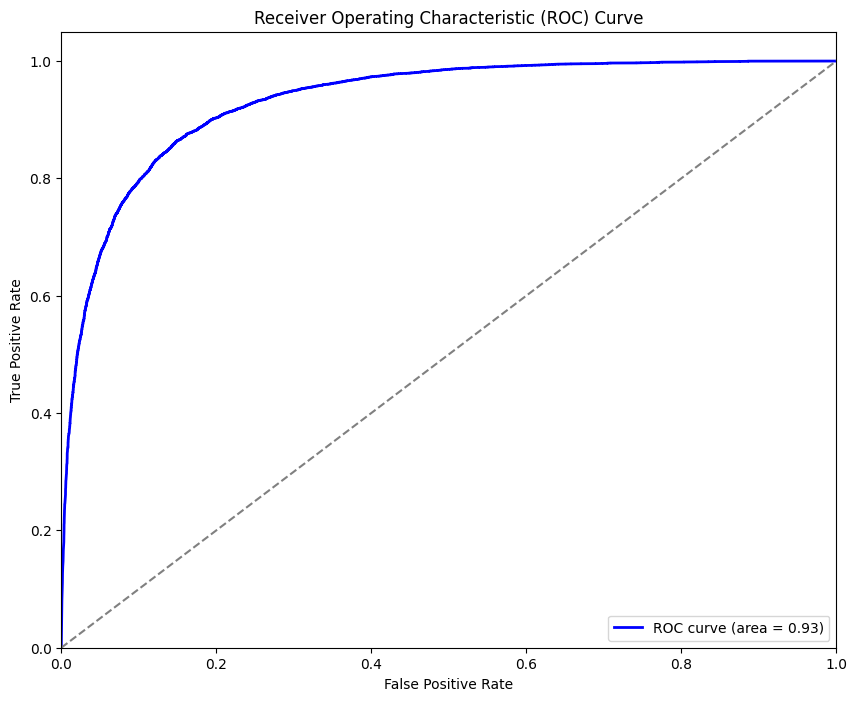

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

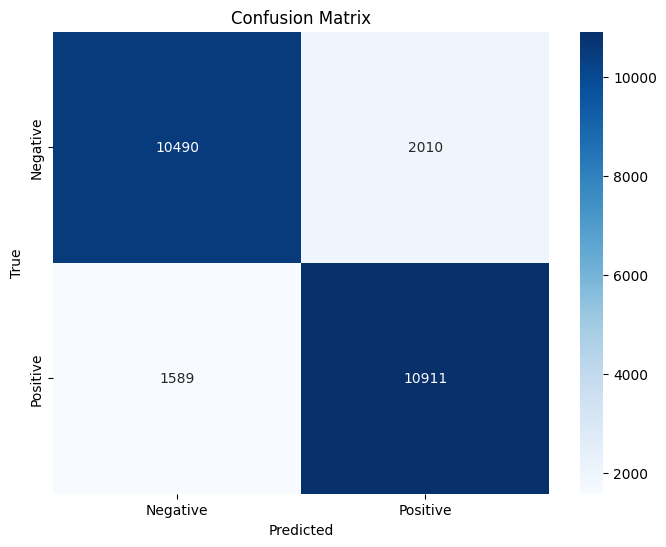

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert predictions to binary class labels
predictions_binary = (predictions > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 494, 32)        │        28,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 92, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,947,813 (15.06 MB)

 Trainable params: 1,315,937 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,631,876 (10.04 MB)

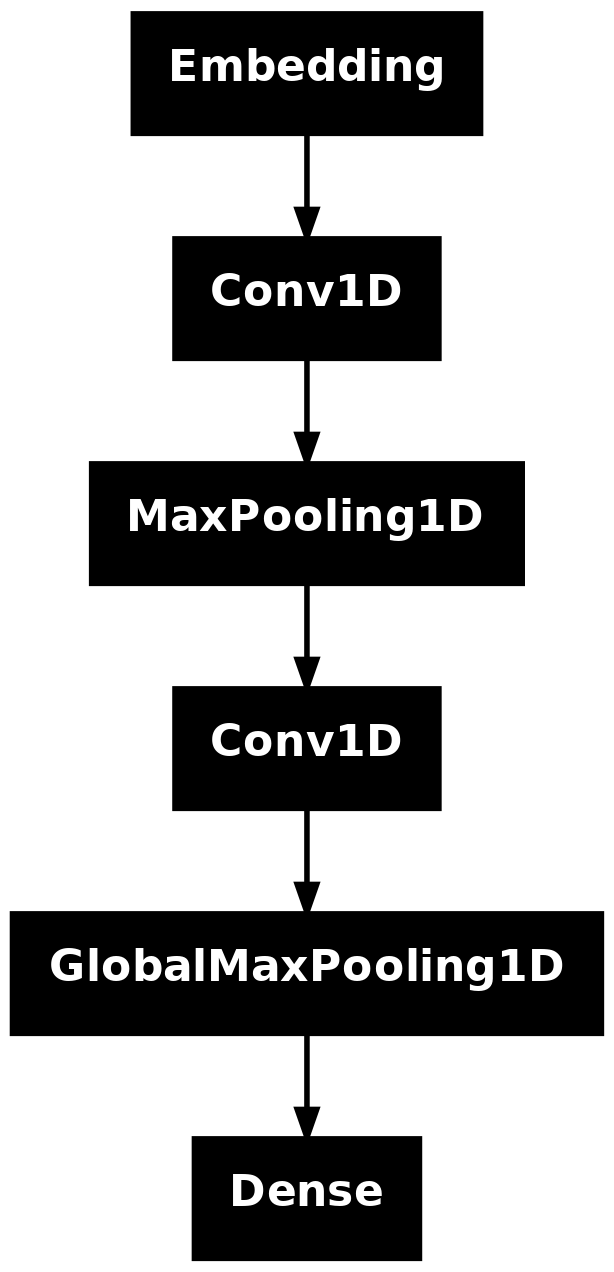

In [6]:
from keras.api.utils import plot_model
plot_model(model)